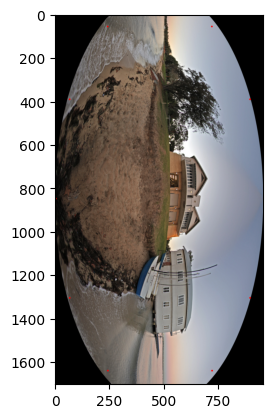

Boundary points: [(3, 849), (67, 392), (242, 57), (482, -64), (722, 57), (898, 392), (963, 849), (898, 1306), (723, 1641), (483, 1763), (243, 1641), (67, 1306)]


In [4]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Load the fisheye image
img = cv2.imread("/content/Screenshot from 2025-08-08 11-46-48.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to get black background vs. image
_, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Get largest contour (outer ellipse)
contour = max(contours, key=cv2.contourArea)

# Fit ellipse to contour
ellipse = cv2.fitEllipse(contour)
(x_center, y_center), (major_axis, minor_axis), angle = ellipse

# Sample 12 evenly spaced points along ellipse boundary
points = []
for i in range(12):
    theta = 2 * math.pi * i / 12
    # Parametric equation of rotated ellipse
    cos_a = math.cos(math.radians(angle))
    sin_a = math.sin(math.radians(angle))
    x = (major_axis/2) * math.cos(theta)
    y = (minor_axis/2) * math.sin(theta)
    x_rot = x * cos_a - y * sin_a + x_center
    y_rot = x * sin_a + y * cos_a + y_center
    points.append((int(x_rot), int(y_rot)))

# Draw points on image
for (px, py) in points:
    cv2.circle(img, (px, py), 4, (0, 0, 255), -1)

# Show
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Print points
print("Boundary points:", points)


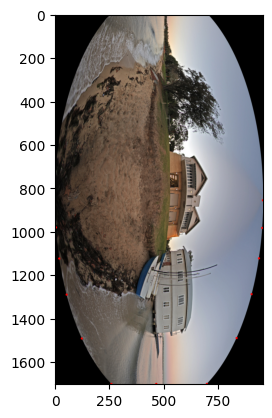

Sampled boundary points: [(np.int32(957), np.int32(857)), (np.int32(954), np.int32(984)), (np.int32(939), np.int32(1124)), (np.int32(905), np.int32(1289)), (np.int32(836), np.int32(1491)), (np.int32(699), np.int32(1702)), (np.int32(466), np.int32(1702)), (np.int32(259), np.int32(1702)), (np.int32(123), np.int32(1493)), (np.int32(53), np.int32(1291)), (np.int32(19), np.int32(1125)), (np.int32(4), np.int32(982))]


In [8]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("/content/Screenshot from 2025-08-08 11-46-48.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to separate black background
_, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contour of boundary
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)

# Compute centroid (approx center of fisheye)
M = cv2.moments(contour)
cx = int(M["m10"] / M["m00"])
cy = int(M["m01"] / M["m00"])

# Convert contour points to polar coordinates relative to center
angles = np.linspace(0, 2*np.pi, 361)  # 1-degree resolution
boundary_points = []

for a in angles:
    # Ray from center at angle a
    dir_x, dir_y = math.cos(a), math.sin(a)
    max_dist = 0
    closest_point = None

    for pt in contour:
        x, y = pt[0]
        dx, dy = x - cx, y - cy
        if dx * dir_x + dy * dir_y > 0:  # Same direction
            dist = math.hypot(dx, dy)
            angle_diff = abs(math.atan2(dy, dx) - a)
            if angle_diff < math.radians(1):  # ~1 degree tolerance
                if dist > max_dist:
                    max_dist = dist
                    closest_point = (x, y)
    if closest_point is not None:
        boundary_points.append(closest_point)

# Now sample exactly 12 evenly spaced angles from boundary_points
sampled_points = [boundary_points[int(i * len(boundary_points) / 12)] for i in range(12)]

# Draw sampled points
for (px, py) in sampled_points:
    cv2.circle(img, (px, py), 5, (0, 0, 255), -1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

print("Sampled boundary points:", sampled_points)


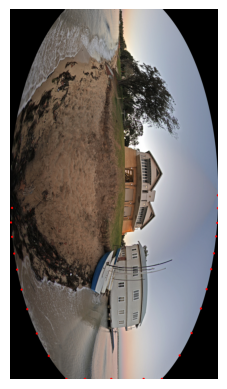

Sampled 24 boundary points: [(np.int32(957), np.int32(857)), (np.int32(957), np.int32(916)), (np.int32(954), np.int32(984)), (np.int32(949), np.int32(1046)), (np.int32(939), np.int32(1124)), (np.int32(926), np.int32(1197)), (np.int32(905), np.int32(1289)), (np.int32(879), np.int32(1378)), (np.int32(836), np.int32(1491)), (np.int32(781), np.int32(1594)), (np.int32(699), np.int32(1702)), (np.int32(615), np.int32(1702)), (np.int32(466), np.int32(1702)), (np.int32(345), np.int32(1702)), (np.int32(259), np.int32(1702)), (np.int32(178), np.int32(1596)), (np.int32(123), np.int32(1493)), (np.int32(79), np.int32(1381)), (np.int32(53), np.int32(1291)), (np.int32(32), np.int32(1199)), (np.int32(19), np.int32(1125)), (np.int32(9), np.int32(1048)), (np.int32(4), np.int32(982)), (np.int32(9), np.int32(915))]


In [11]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("/content/Screenshot from 2025-08-08 11-46-48.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to separate black background
_, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contour of boundary
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)

# Compute centroid (approx center of fisheye)
M = cv2.moments(contour)
cx = int(M["m10"] / M["m00"])
cy = int(M["m01"] / M["m00"])

# Convert contour points to polar coordinates relative to center
angles = np.linspace(0, 2*np.pi, 361)  # 1-degree resolution
boundary_points = []

for a in angles:
    dir_x, dir_y = math.cos(a), math.sin(a)
    max_dist = 0
    closest_point = None

    for pt in contour:
        x, y = pt[0]
        dx, dy = x - cx, y - cy
        if dx * dir_x + dy * dir_y > 0:  # Same general direction
            dist = math.hypot(dx, dy)
            angle_diff = abs(math.atan2(dy, dx) - a)
            if angle_diff < math.radians(1):  # ~1 degree tolerance
                if dist > max_dist:
                    max_dist = dist
                    closest_point = (x, y)
    if closest_point is not None:
        boundary_points.append(closest_point)

# Sample exactly 24 evenly spaced points
sampled_points = [boundary_points[int(i * len(boundary_points) / 24)] for i in range(24)]

# Draw sampled points
for (px, py) in sampled_points:
    cv2.circle(img, (px, py), 5, (0, 0, 255), -1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("Sampled 24 boundary points:", sampled_points)


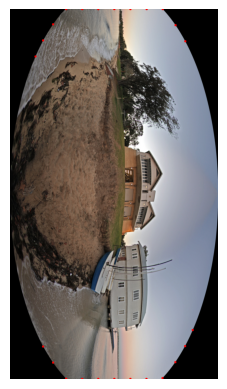

Sampled 24 left/right points: [(np.int32(117), np.int32(218)), (np.int32(152), np.int32(144)), (np.int32(198), np.int32(70)), (np.int32(258), np.int32(0)), (np.int32(332), np.int32(0)), (np.int32(406), np.int32(0)), (np.int32(480), np.int32(0)), (np.int32(554), np.int32(0)), (np.int32(629), np.int32(0)), (np.int32(703), np.int32(0)), (np.int32(762), np.int32(74)), (np.int32(807), np.int32(148)), (np.int32(841), np.int32(1477)), (np.int32(806), np.int32(1551)), (np.int32(761), np.int32(1625)), (np.int32(702), np.int32(1698)), (np.int32(628), np.int32(1702)), (np.int32(554), np.int32(1702)), (np.int32(480), np.int32(1702)), (np.int32(406), np.int32(1702)), (np.int32(332), np.int32(1702)), (np.int32(258), np.int32(1701)), (np.int32(198), np.int32(1627)), (np.int32(152), np.int32(1553))]


In [12]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("/content/Screenshot from 2025-08-08 11-46-48.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to separate black background
_, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contour of boundary
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)

# Compute centroid
M = cv2.moments(contour)
cx = int(M["m10"] / M["m00"])
cy = int(M["m01"] / M["m00"])

# Keep only left/right points (exclude top/bottom)
# Here, we exclude points within ±30 degrees of vertical (top/bottom)
filtered_points = []
for pt in contour:
    x, y = pt[0]
    angle = math.degrees(math.atan2(y - cy, x - cx))
    if 60 < abs(angle) < 120:  # roughly left and right regions
        filtered_points.append((x, y))

# Sort by angle for consistent ordering
filtered_points.sort(key=lambda p: math.atan2(p[1] - cy, p[0] - cx))

# Sample 24 points evenly from filtered points
sampled_points = [filtered_points[int(i * len(filtered_points) / 24)] for i in range(24)]

# Draw sampled points
for (px, py) in sampled_points:
    cv2.circle(img, (px, py), 5, (0, 0, 255), -1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("Sampled 24 left/right points:", sampled_points)


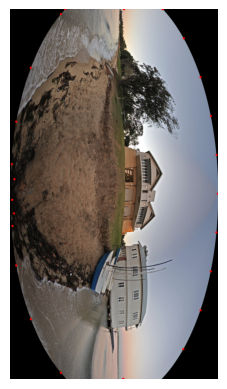

Left + Right boundary points: [(np.int32(254), np.int32(0)), (np.int32(234), np.int32(23)), (np.int32(95), np.int32(270)), (np.int32(28), np.int32(518)), (np.int32(8), np.int32(714)), (np.int32(20), np.int32(783)), (np.int32(10), np.int32(878)), (np.int32(18), np.int32(940)), (np.int32(11), np.int32(998)), (np.int32(28), np.int32(1180)), (np.int32(95), np.int32(1427)), (np.int32(234), np.int32(1674)), (np.int32(703), np.int32(0)), (np.int32(525), np.int32(0)), (np.int32(800), np.int32(134)), (np.int32(877), np.int32(313)), (np.int32(925), np.int32(492)), (np.int32(951), np.int32(671)), (np.int32(957), np.int32(850)), (np.int32(950), np.int32(1028)), (np.int32(924), np.int32(1207)), (np.int32(877), np.int32(1386)), (np.int32(798), np.int32(1565)), (np.int32(521), np.int32(1702))]


In [13]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("/content/Screenshot from 2025-08-08 11-46-48.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to separate black background
_, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contour of boundary
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)

# Image center
h, w = gray.shape
cx, cy = w // 2, h // 2

# Filter left and right points
left_points = [tuple(pt[0]) for pt in contour if pt[0][0] < cx]
right_points = [tuple(pt[0]) for pt in contour if pt[0][0] > cx]

# Sort by vertical position (y-coordinate) for consistent ordering
left_points.sort(key=lambda p: p[1])
right_points.sort(key=lambda p: p[1])

# Pick 12 evenly spaced from each side
def sample_points(points, n=12):
    return [points[int(i * len(points) / n)] for i in range(n)]

left_sample = sample_points(left_points, 12)
right_sample = sample_points(right_points, 12)

# Combine
sampled_points = left_sample + right_sample

# Draw points
for (px, py) in sampled_points:
    cv2.circle(img, (px, py), 5, (0, 0, 255), -1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("Left + Right boundary points:", sampled_points)


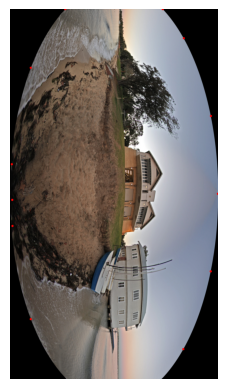

Left + Right boundary points: [(np.int32(254), np.int32(0)), (np.int32(95), np.int32(270)), (np.int32(8), np.int32(714)), (np.int32(10), np.int32(878)), (np.int32(11), np.int32(998)), (np.int32(95), np.int32(1427)), (np.int32(703), np.int32(0)), (np.int32(800), np.int32(134)), (np.int32(925), np.int32(492)), (np.int32(957), np.int32(850)), (np.int32(924), np.int32(1207)), (np.int32(798), np.int32(1565))]


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("/content/Screenshot from 2025-08-08 11-46-48.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to separate black background
_, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contour of boundary
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)

# Image center
h, w = gray.shape
cx, cy = w // 2, h // 2

# Filter left and right points
left_points = [tuple(pt[0]) for pt in contour if pt[0][0] < cx]
right_points = [tuple(pt[0]) for pt in contour if pt[0][0] > cx]

# Sort by vertical position (y-coordinate)
left_points.sort(key=lambda p: p[1])
right_points.sort(key=lambda p: p[1])

# Function to pick N evenly spaced points
def sample_points(points, n=6):
    return [points[int(i * len(points) / n)] for i in range(n)]

# Sample 6 points from each side
left_sample = sample_points(left_points, 6)
right_sample = sample_points(right_points, 6)

# Combine
sampled_points = left_sample + right_sample

# Draw points on image
for (px, py) in sampled_points:
    cv2.circle(img, (px, py), 5, (0, 0, 255), -1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("Left + Right boundary points:", sampled_points)


In [20]:
import cv2
import numpy as np

# Load fisheye image
img = cv2.imread("/content/Screenshot from 2025-08-08 11-46-48.png")
h, w = img.shape[:2]
print(h,w)
# Convert to grayscale to detect non-black region
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find outer contour
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)

# Get bounding box of outer boundary
x, y, cw, ch = cv2.boundingRect(contour)

# Crop the image to the bounding box of the oval
cropped_img = img[y:y+ch, x:x+cw]

# Determine new square side length
side = max(cw, ch)

# Calculate padding to center the cropped image
top_pad = (side - ch) // 2
bottom_pad = side - ch - top_pad
left_pad = (side - cw) // 2
right_pad = side - cw - left_pad

# Pad image to make it perfectly square
padded_img = cv2.copyMakeBorder(
    cropped_img, top_pad, bottom_pad, left_pad, right_pad,
    cv2.BORDER_CONSTANT, value=(0, 0, 0)
)

# Create circular mask with the same size as padded_img
square_mask = np.zeros((side, side), dtype=np.uint8)
cv2.circle(square_mask, (side//2, side//2), side//2, 255, -1)

# Apply circular mask
result = cv2.bitwise_and(padded_img, padded_img, mask=square_mask)

# Get perfect circle boundary points
contours, _ = cv2.findContours(square_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
circle_boundary = contours[0].squeeze()

# Sample 12 evenly spaced points
sample_indices = np.linspace(0, len(circle_boundary)-1, 12, dtype=int)
boundary_points = circle_boundary[sample_indices]

# Draw points on the result
for pt in boundary_points:
    cv2.circle(result, tuple(pt), 4, (0, 0, 255), -1)

cv2.imwrite("fisheye_circle_boundary.png", result)

print("12 Circle Boundary Points:\n", boundary_points,result.shape)


1703 958
12 Circle Boundary Points:
 [[ 851    0]
 [ 414  121]
 [  67  522]
 [   8  960]
 [ 199 1397]
 [ 631 1673]
 [1069 1673]
 [1502 1399]
 [1694  962]
 [1636  524]
 [1290  122]
 [ 852    1]] (1703, 1703, 3)


In [21]:
import cv2
import numpy as np

# Load fisheye image
img = cv2.imread("/content/Screenshot from 2025-08-08 11-46-48.png")
h, w = img.shape[:2]

# Convert to grayscale to detect non-black region
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find outer contour
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)

# Get bounding box of outer boundary
x, y, cw, ch = cv2.boundingRect(contour)

# Crop the image to the bounding box of the oval
cropped_img = img[y:y+ch, x:x+cw]

# Make it square by padding inside the original image size
side = max(cw, ch)

# Calculate padding for the square
top_pad = (side - ch) // 2
bottom_pad = side - ch - top_pad
left_pad = (side - cw) // 2
right_pad = side - cw - left_pad

# Create square padded version (still smaller than final output size)
square_img = cv2.copyMakeBorder(
    cropped_img, top_pad, bottom_pad, left_pad, right_pad,
    cv2.BORDER_CONSTANT, value=(0, 0, 0)
)

# Resize square back to original input size
square_resized = cv2.resize(square_img, (w, h))

# Create circular mask of same size as original image
circle_mask = np.zeros((h, w), dtype=np.uint8)
cv2.circle(circle_mask, (w//2, h//2), min(h, w)//2, 255, -1)

# Apply circular mask
result = cv2.bitwise_and(square_resized, square_resized, mask=circle_mask)

# Get perfect circle boundary points
contours, _ = cv2.findContours(circle_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
circle_boundary = contours[0].squeeze()

# Sample 12 evenly spaced points
sample_indices = np.linspace(0, len(circle_boundary)-1, 12, dtype=int)
boundary_points = circle_boundary[sample_indices]

# Draw points on the result
for pt in boundary_points:
    cv2.circle(result, tuple(pt), 4, (0, 0, 255), -1)

cv2.imwrite("fisheye_circle_boundary.png", result)

print("12 Circle Boundary Points:\n", boundary_points)


12 Circle Boundary Points:
 [[ 479  372]
 [ 233  440]
 [  38  666]
 [   4  912]
 [ 112 1158]
 [ 355 1313]
 [ 601 1314]
 [ 845 1160]
 [ 953  914]
 [ 921  668]
 [ 727  442]
 [ 480  373]]


In [ ]:
import cv2
import numpy as np
import math

# -------- Settings --------
image_path = 'image/fe1.jpg'
yolo_file = 'bboxes.txt'
output_image = 'output_hemi_cylinder.jpg'
output_yolo = 'bboxes_corrected.txt'

# -------- Load image --------
fisheye_image = cv2.imread(image_path)
height, width = fisheye_image.shape[:2]

Cx = width / 2.0
Cy = height / 2.0
F = width / math.pi
r_const = width / math.pi

# -------- Vectorized mapping --------
u_grid, v_grid = np.meshgrid(np.arange(width), np.arange(height))
xt = u_grid - Cx
yt = v_grid - Cy

alpha = (width / 2.0 - xt) / r_const
xp = r_const * np.cos(alpha)
yp = yt
zp = r_const * np.abs(np.sin(alpha))
rp = np.sqrt(xp**2 + yp**2)

# Avoid divide-by-zero
rp_safe = np.where(rp == 0, 1e-6, rp)

theta = np.arctan2(rp, zp)
x1 = F * theta * xp / rp_safe
y1 = F * theta * yp / rp_safe

map_x = (x1 + Cx).astype(np.float32)
map_y = (y1 + Cy).astype(np.float32)

# -------- Remap image --------
corrected_image = cv2.remap(
    fisheye_image, map_x, map_y,
    interpolation=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT
)
cv2.imwrite(output_image, corrected_image)

# -------- Function to map single point --------
def map_point(u, v):
    xt = u - Cx
    yt = v - Cy
    alpha = (width / 2.0 - xt) / r_const
    xp = r_const * math.cos(alpha)
    yp = yt
    zp = r_const * abs(math.sin(alpha))
    rp = math.sqrt(xp**2 + yp**2)
    if rp == 0:
        return Cx, Cy
    theta = math.atan2(rp, zp)
    x1 = F * theta * xp / rp
    y1 = F * theta * yp / rp
    return x1 + Cx, y1 + Cy

# -------- Transform YOLO bboxes --------
new_bboxes = []
with open(yolo_file, 'r') as f:
    for line in f:
        cls, xc, yc, w, h = map(float, line.strip().split())

        # Pixel coords
        box_w = w * width
        box_h = h * height
        cx_pix = xc * width
        cy_pix = yc * height

        x_min = cx_pix - box_w / 2
        y_min = cy_pix - box_h / 2
        x_max = cx_pix + box_w / 2
        y_max = cy_pix + box_h / 2

        # Four corners → mapped
        corners = [
            (x_min, y_min),
            (x_max, y_min),
            (x_max, y_max),
            (x_min, y_max)
        ]
        mapped_corners = [map_point(int(x), int(y)) for x, y in corners]

        # New axis-aligned bbox
        xs = [p[0] for p in mapped_corners]
        ys = [p[1] for p in mapped_corners]
        new_x_min = max(0, min(xs))
        new_y_min = max(0, min(ys))
        new_x_max = min(width, max(xs))
        new_y_max = min(height, max(ys))

        # Back to YOLO format
        new_w = (new_x_max - new_x_min) / width
        new_h = (new_y_max - new_y_min) / height
        new_xc = (new_x_min + new_x_max) / 2 / width
        new_yc = (new_y_min + new_y_max) / 2 / height

        new_bboxes.append(f"{int(cls)} {new_xc:.6f} {new_yc:.6f} {new_w:.6f} {new_h:.6f}")

# -------- Save transformed YOLO bboxes --------
with open(output_yolo, 'w') as f:
    f.write("\n".join(new_bboxes))

print(f"✅ Corrected image saved: {output_image}")
print(f"✅ Corrected YOLO labels saved: {output_yolo}")


In [ ]:
import cv2
import numpy as np
import math

# -------- Settings --------
image_path = 'image/fe1.jpg'
yolo_file = 'bboxes.txt'
output_image = 'output_hemi_cylinder.jpg'
output_yolo = 'bboxes_corrected.txt'
vis_input = 'input_with_bboxes.jpg'
vis_output = 'output_with_bboxes.jpg'

# -------- Load image --------
fisheye_image = cv2.imread(image_path)
height, width = fisheye_image.shape[:2]

Cx = width / 2.0
Cy = height / 2.0
F = width / math.pi
r_const = width / math.pi

# -------- Vectorized mapping --------
u_grid, v_grid = np.meshgrid(np.arange(width), np.arange(height))
xt = u_grid - Cx
yt = v_grid - Cy

alpha = (width / 2.0 - xt) / r_const
xp = r_const * np.cos(alpha)
yp = yt
zp = r_const * np.abs(np.sin(alpha))
rp = np.sqrt(xp**2 + yp**2)
rp_safe = np.where(rp == 0, 1e-6, rp)

theta = np.arctan2(rp, zp)
x1 = F * theta * xp / rp_safe
y1 = F * theta * yp / rp_safe

map_x = (x1 + Cx).astype(np.float32)
map_y = (y1 + Cy).astype(np.float32)

# -------- Remap image --------
corrected_image = cv2.remap(
    fisheye_image, map_x, map_y,
    interpolation=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT
)
cv2.imwrite(output_image, corrected_image)

# -------- Helper to map one point --------
def map_point(u, v):
    xt = u - Cx
    yt = v - Cy
    alpha = (width / 2.0 - xt) / r_const
    xp = r_const * math.cos(alpha)
    yp = yt
    zp = r_const * abs(math.sin(alpha))
    rp = math.sqrt(xp**2 + yp**2)
    if rp == 0:
        return Cx, Cy
    theta = math.atan2(rp, zp)
    x1 = F * theta * xp / rp
    y1 = F * theta * yp / rp
    return x1 + Cx, y1 + Cy

# -------- Draw input and output bboxes --------
input_vis = fisheye_image.copy()
output_vis = corrected_image.copy()

new_bboxes = []
with open(yolo_file, 'r') as f:
    for line in f:
        cls, xc, yc, w, h = map(float, line.strip().split())

        # --- Input bbox (pixels) ---
        box_w = w * width
        box_h = h * height
        cx_pix = xc * width
        cy_pix = yc * height
        x_min = int(cx_pix - box_w / 2)
        y_min = int(cy_pix - box_h / 2)
        x_max = int(cx_pix + box_w / 2)
        y_max = int(cy_pix + box_h / 2)

        # Draw red bbox on input
        cv2.rectangle(input_vis, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)

        # --- Map corners to output ---
        corners = [
            (x_min, y_min),
            (x_max, y_min),
            (x_max, y_max),
            (x_min, y_max)
        ]
        mapped_corners = [map_point(int(x), int(y)) for x, y in corners]

        xs = [p[0] for p in mapped_corners]
        ys = [p[1] for p in mapped_corners]
        new_x_min = max(0, min(xs))
        new_y_min = max(0, min(ys))
        new_x_max = min(width, max(xs))
        new_y_max = min(height, max(ys))

        # Draw green bbox on output
        cv2.rectangle(output_vis,
                      (int(new_x_min), int(new_y_min)),
                      (int(new_x_max), int(new_y_max)),
                      (0, 255, 0), 2)

        # Convert back to YOLO format
        new_w = (new_x_max - new_x_min) / width
        new_h = (new_y_max - new_y_min) / height
        new_xc = (new_x_min + new_x_max) / 2 / width
        new_yc = (new_y_min + new_y_max) / 2 / height

        new_bboxes.append(f"{int(cls)} {new_xc:.6f} {new_yc:.6f} {new_w:.6f} {new_h:.6f}")

# -------- Save new YOLO labels --------
with open(output_yolo, 'w') as f:
    f.write("\n".join(new_bboxes))

# -------- Save visualizations --------
cv2.imwrite(vis_input, input_vis)
cv2.imwrite(vis_output, output_vis)

print(f"✅ Corrected image saved: {output_image}")
print(f"✅ Corrected YOLO labels saved: {output_yolo}")
print(f"✅ Input bbox visualization: {vis_input}")
print(f"✅ Output bbox visualization: {vis_output}")


In [ ]:
import cv2
import numpy as np
import math

# -------- Settings --------
image_path = 'image/fe1.jpg'
yolo_file = 'bboxes.txt'
output_image = 'output_hemi_cylinder.jpg'
output_yolo = 'bboxes_corrected.txt'
vis_input = 'input_with_bboxes.jpg'
vis_output = 'output_with_bboxes.jpg'

# -------- Load image --------
src = cv2.imread(image_path)
h, w = src.shape[:2]

Cx = w / 2.0
Cy = h / 2.0
F = w / math.pi
r_const = w / math.pi

# -------- Vectorized mapping (same as before) --------
u_grid, v_grid = np.meshgrid(np.arange(w), np.arange(h))
xt = u_grid - Cx
yt = v_grid - Cy

alpha = (w / 2.0 - xt) / r_const
xp = r_const * np.cos(alpha)
yp = yt
zp = r_const * np.abs(np.sin(alpha))
rp = np.sqrt(xp**2 + yp**2)
rp_safe = np.where(rp == 0, 1e-6, rp)

theta = np.arctan2(rp, zp)
x1 = F * theta * xp / rp_safe
y1 = F * theta * yp / rp_safe

map_x = (x1 + Cx).astype(np.float32)
map_y = (y1 + Cy).astype(np.float32)

# -------- Remap image --------
dst = cv2.remap(src, map_x, map_y, interpolation=cv2.INTER_CUBIC,
                borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))
cv2.imwrite(output_image, dst)

# -------- Visual copies --------
input_vis = src.copy()
output_vis = dst.copy()

new_bboxes = []
with open(yolo_file, 'r') as f:
    for line in f:
        parts = line.strip().split()
        if not parts:
            continue
        cls, xc, yc, bw, bh = map(float, parts)

        # --- Source bbox in pixels (float is fine) ---
        box_w = bw * w
        box_h = bh * h
        cx_pix = xc * w
        cy_pix = yc * h
        x_min = int(round(cx_pix - box_w / 2.0))
        y_min = int(round(cy_pix - box_h / 2.0))
        x_max = int(round(cx_pix + box_w / 2.0))
        y_max = int(round(cy_pix + box_h / 2.0))

        # clamp source bbox
        x_min = max(0, min(w-1, x_min))
        y_min = max(0, min(h-1, y_min))
        x_max = max(0, min(w-1, x_max))
        y_max = max(0, min(h-1, y_max))

        # Draw input bbox (red)
        cv2.rectangle(input_vis, (x_min, y_min), (x_max, y_max), (0,0,255), 2)

        # --- Create source mask for this bbox and remap it ---
        mask = np.zeros((h, w), dtype=np.uint8)
        cv2.rectangle(mask, (x_min, y_min), (x_max, y_max), 255, thickness=-1)

        # Remap mask using the SAME map_x,map_y used for the image.
        remapped_mask = cv2.remap(mask, map_x, map_y, interpolation=cv2.INTER_NEAREST,
                                  borderMode=cv2.BORDER_CONSTANT, borderValue=0)

        # Optional: close small holes (helps when mask warps thinly)
        kernel = np.ones((3,3), np.uint8)
        remapped_mask = cv2.morphologyEx(remapped_mask, cv2.MORPH_CLOSE, kernel, iterations=1)

        # Find non-zero region
        ys, xs = np.where(remapped_mask > 0)
        if xs.size == 0:
            # no overlap in the output (object mapped out) -> save zero bbox
            new_bboxes.append(f"{int(cls)} 0.0 0.0 0.0 0.0")
        else:
            nx_min, nx_max = int(xs.min()), int(xs.max())
            ny_min, ny_max = int(ys.min()), int(ys.max())

            # draw output bbox (green)
            cv2.rectangle(output_vis, (nx_min, ny_min), (nx_max, ny_max), (0,255,0), 2)

            # Convert to YOLO normalized
            n_w = (nx_max - nx_min) / float(w)
            n_h = (ny_max - ny_min) / float(h)
            n_xc = (nx_min + nx_max) / 2.0 / float(w)
            n_yc = (ny_min + ny_max) / 2.0 / float(h)

            new_bboxes.append(f"{int(cls)} {n_xc:.6f} {n_yc:.6f} {n_w:.6f} {n_h:.6f}")

# -------- Save results --------
with open(output_yolo, 'w') as f:
    f.write("\n".join(new_bboxes))

cv2.imwrite(vis_input, input_vis)
cv2.imwrite(vis_output, output_vis)

print("Saved:", output_image, output_yolo, vis_input, vis_output)


In [ ]:
nx_min, nx_max = int(xs.min()), int(xs.max())
ny_min, ny_max = int(ys.min()), int(ys.max())

# shrink width
shrink_factor = 0.9
bbox_w = nx_max - nx_min
bbox_cx = (nx_min + nx_max) / 2.0
new_w = bbox_w * shrink_factor
nx_min = int(round(bbox_cx - new_w / 2.0))
nx_max = int(round(bbox_cx + new_w / 2.0))
nx_min = max(0, min(w-1, nx_min))
nx_max = max(0, min(w-1, nx_max))


In [ ]:
import cv2
import numpy as np
import math
import os

# -------- Paths --------
image_path = 'image/fe1.jpg'
yolo_path = 'bboxes.txt'
out_image_path = 'output_hemi_cylinder.jpg'
out_yolo_path = 'bboxes_corrected.txt'
debug_in_bbox = 'debug_input_bbox.jpg'
debug_out_bbox = 'debug_output_bbox.jpg'

# -------- Load image --------
fisheye_image = cv2.imread(image_path)
if fisheye_image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

h, w = fisheye_image.shape[:2]

# -------- Projection constants --------
Cx = w / 2.0
Cy = h / 2.0
F = w / math.pi
r_const = w / math.pi

# -------- Vectorized mapping --------
u_grid, v_grid = np.meshgrid(np.arange(w), np.arange(h))
xt = u_grid - Cx
yt = v_grid - Cy

alpha = (w / 2.0 - xt) / r_const
xp = r_const * np.cos(alpha)
yp = yt
zp = r_const * np.abs(np.sin(alpha))
rp = np.sqrt(xp**2 + yp**2)
rp_safe = np.where(rp == 0, 1e-6, rp)  # avoid div zero

theta = np.arctan2(rp, zp)
x1 = F * theta * xp / rp_safe
y1 = F * theta * yp / rp_safe

map_x = (x1 + Cx).astype(np.float32)
map_y = (y1 + Cy).astype(np.float32)

# -------- Remap fisheye → cylindrical --------
corrected_image = cv2.remap(
    fisheye_image, map_x, map_y,
    interpolation=cv2.INTER_CUBIC,
    borderMode=cv2.BORDER_CONSTANT
)
cv2.imwrite(out_image_path, corrected_image)

# -------- Helper: map single point --------
def map_point(u, v):
    xt = u - Cx
    yt = v - Cy
    alpha = (w / 2.0 - xt) / r_const
    xp = r_const * math.cos(alpha)
    yp = yt
    zp = r_const * abs(math.sin(alpha))
    rp = math.sqrt(xp**2 + yp**2)
    if rp == 0:
        return Cx, Cy
    theta = math.atan2(rp, zp)
    x1 = F * theta * xp / rp
    y1 = F * theta * yp / rp
    return x1 + Cx, y1 + Cy

# -------- Read YOLO bboxes --------
if not os.path.exists(yolo_path):
    raise FileNotFoundError(f"YOLO label file not found: {yolo_path}")

with open(yolo_path, 'r') as f:
    bboxes = [line.strip() for line in f if line.strip()]

# -------- Debug images --------
debug_in = fisheye_image.copy()
debug_out = corrected_image.copy()

# -------- Transform bboxes --------
new_bboxes = []
for line in bboxes:
    cls, xc, yc, bw, bh = map(float, line.split())

    # Pixel coords
    box_w = bw * w
    box_h = bh * h
    cx_pix = xc * w
    cy_pix = yc * h

    x_min = cx_pix - box_w / 2
    y_min = cy_pix - box_h / 2
    x_max = cx_pix + box_w / 2
    y_max = cy_pix + box_h / 2

    # Draw original bbox
    cv2.rectangle(debug_in,
                  (int(x_min), int(y_min)),
                  (int(x_max), int(y_max)),
                  (0, 255, 0), 2)

    # Four corners → mapped
    corners = [
        (x_min, y_min),
        (x_max, y_min),
        (x_max, y_max),
        (x_min, y_max)
    ]
    mapped_corners = [map_point(int(x), int(y)) for x, y in corners]

    xs = np.array([p[0] for p in mapped_corners])
    ys = np.array([p[1] for p in mapped_corners])

    nx_min = int(xs.min())
    nx_max = int(xs.max())
    ny_min = int(ys.min())
    ny_max = int(ys.max())

    # -------- Adaptive width shrink --------
    bbox_w = nx_max - nx_min
    bbox_h = ny_max - ny_min
    bbox_cx = (nx_min + nx_max) / 2.0

    aspect_ratio = bbox_w / max(bbox_h, 1)
    if aspect_ratio > 2.0:
        shrink_factor = 0.85
    elif aspect_ratio > 1.5:
        shrink_factor = 0.9
    elif aspect_ratio > 1.2:
        shrink_factor = 0.95
    else:
        shrink_factor = 1.0

    new_w = bbox_w * shrink_factor
    nx_min = int(round(bbox_cx - new_w / 2.0))
    nx_max = int(round(bbox_cx + new_w / 2.0))

    # Clamp
    nx_min = max(0, min(w - 1, nx_min))
    nx_max = max(0, min(w - 1, nx_max))
    ny_min = max(0, min(h - 1, ny_min))
    ny_max = max(0, min(h - 1, ny_max))

    # Draw transformed bbox
    cv2.rectangle(debug_out,
                  (nx_min, ny_min),
                  (nx_max, ny_max),
                  (0, 0, 255), 2)

    # Back to YOLO format
    new_bw = (nx_max - nx_min) / w
    new_bh = (ny_max - ny_min) / h
    new_xc = ((nx_min + nx_max) / 2.0) / w
    new_yc = ((ny_min + ny_max) / 2.0) / h

    new_bboxes.append(f"{int(cls)} {new_xc:.6f} {new_yc:.6f} {new_bw:.6f} {new_bh:.6f}")

# -------- Save YOLO corrected labels --------
with open(out_yolo_path, 'w') as f:
    f.write("\n".join(new_bboxes))

# -------- Save debug images --------
cv2.imwrite(debug_in_bbox, debug_in)
cv2.imwrite(debug_out_bbox, debug_out)

print(f"✅ Corrected image saved: {out_image_path}")
print(f"✅ Corrected YOLO labels saved: {out_yolo_path}")
print(f"✅ Debug input bbox image: {debug_in_bbox}")
print(f"✅ Debug output bbox image: {debug_out_bbox}")
